# Traffic Sign Detection

Data folders have been manually cleaned to remove any residual files (.DSStore) that are not images. Manual cleaning was done as part of visual inspection of the data folders and since not many such files were present, it was easier to manually dlete them. The data is now ready to be used for training.

#### Import libraries

In [1]:
# import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
import warnings
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

#### Declare lists to build the dataset

In [2]:
path_to_dataset = 'Dataset/trafficsigns_dataset'
image_path = []
sign_shape = []
sign_type = []

#### Recursively fetch the image paths, type and shape from the folders

In [3]:
# Traverse the folder tree and get the image paths, type and shape
for shape_folder in os.listdir(path_to_dataset):
    shape_path = os.path.join(path_to_dataset, shape_folder)
    if os.path.isdir(shape_path):
        # get the parent shape folders
        for type_folder in os.listdir(shape_path):
            sign_path = os.path.join(shape_path, type_folder)
            if os.path.isdir(sign_path):
                # get the type folders
                for image_file in os.listdir(sign_path):
                    # save the image paths, type and shape
                    image_path.append(os.path.join(sign_path, image_file))
                    sign_shape.append(shape_folder)
                    sign_type.append(type_folder)


#### Build the dataframe

In [4]:
# Create a DataFrame from the data
data = {'Path': image_path, 'Shape': sign_shape, 'Type': sign_type}
df = pd.DataFrame(data)
df.head(5)

,Path,Shape,Type
0,Dataset/trafficsigns_dataset/diamond/rightofwa...,diamond,rightofway
1,Dataset/trafficsigns_dataset/diamond/rightofwa...,diamond,rightofway
2,Dataset/trafficsigns_dataset/diamond/rightofwa...,diamond,rightofway
3,Dataset/trafficsigns_dataset/diamond/rightofwa...,diamond,rightofway
4,Dataset/trafficsigns_dataset/diamond/rightofwa...,diamond,rightofway


#### Data Exploration

In [5]:
# Print the information of the DataFrame
print("##########################")
print("Shape: ", df.shape)
print("##########################")
print("Missing Values:")
print(df.isna().sum())
print("##########################")
print("Data Types:")
print(df.dtypes)
print("##########################")
print("Unique Shapes:")
print(df['Shape'].unique())
print("##########################")
print("Unique Signs:")
print(df['Type'].unique())

##########################
Shape:  (3699, 3)
##########################
Missing Values:
Path     0
Shape    0
Type     0
dtype: int64
##########################
Data Types:
Path     object
Shape    object
Type     object
dtype: object
##########################
Unique Shapes:
['diamond' 'hex' 'square' 'triangle' 'round']
##########################
Unique Signs:
['rightofway' 'stop' 'laneend' 'parking' 'continue' 'crossing' 'giveway'
 'warning' 'traveldirection' 'limitedtraffic' 'speed' 'roundabout'
 'noentry' 'noparking' 'bicycle' 'trafficdirective']


In [6]:
# Count the number of each unique shape in the DataFrame
shape_counts = df['Shape'].value_counts()
print("Shape Counts:")
print(shape_counts)

Shape Counts:
Shape
round       1760
triangle     926
square       688
diamond      282
hex           43
Name: count, dtype: int64


In [7]:
# Count the number of each unique type in the DataFrame
shape_counts = df['Type'].value_counts()
print("Shape Counts:")
print(shape_counts)

Shape Counts:
Type
warning             695
noentry             375
speed               316
bicycle             285
rightofway          282
parking             276
noparking           242
giveway             231
continue            199
trafficdirective    195
limitedtraffic      125
traveldirection     124
laneend             118
roundabout           98
crossing             95
stop                 43
Name: count, dtype: int64


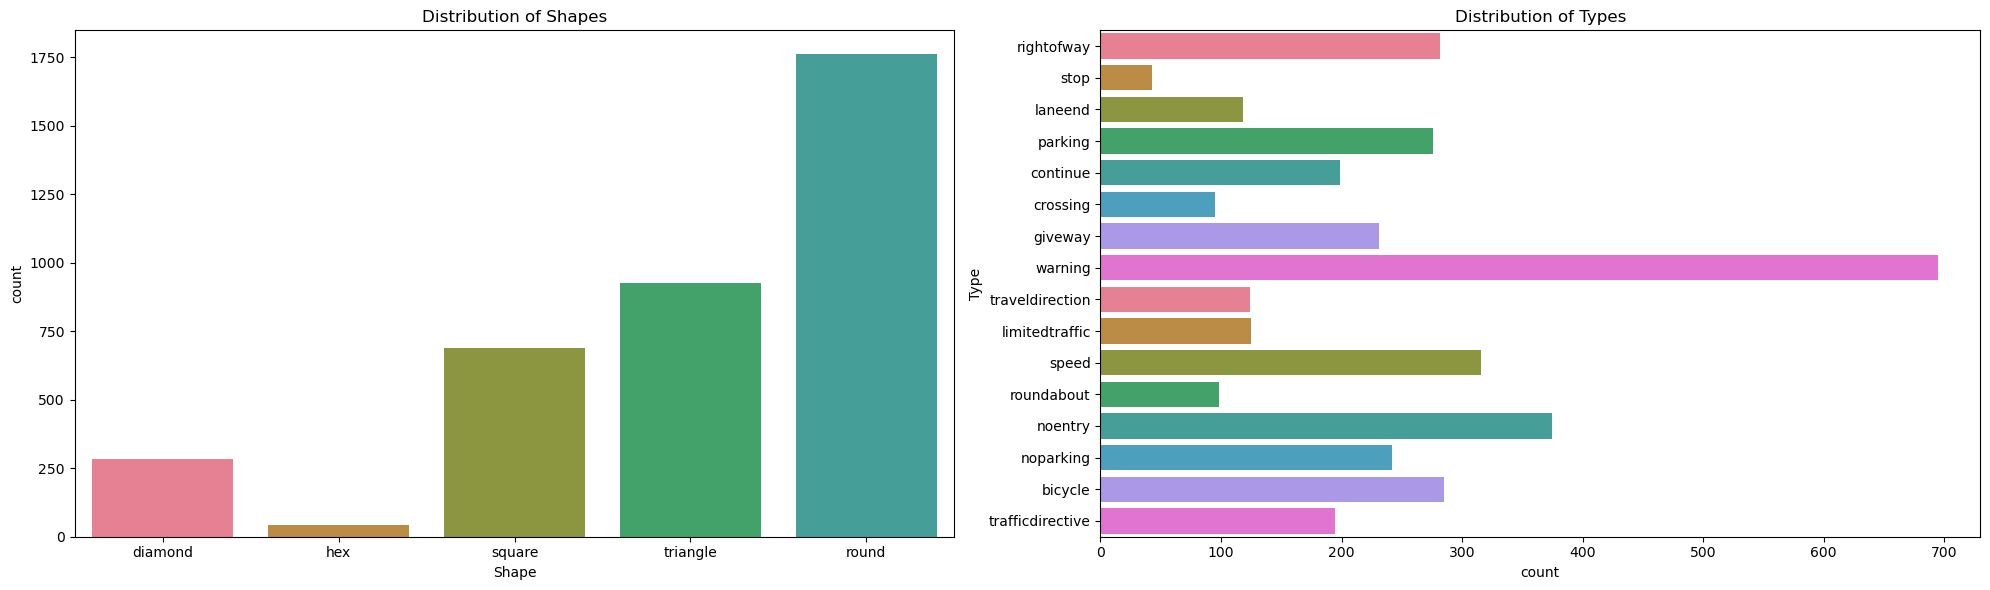

In [8]:
custom_palette = sns.color_palette("husl", 8)  

# plot distribution of each class
fig, axs = plt.subplots(1, 2, figsize=(20,6))

# Plot distribution of each class within shape
sns.countplot(data=df, x='Shape', ax=axs[0], palette=custom_palette)
axs[0].set_title('Distribution of Shapes')

# Plot distribution of each class within type
sns.countplot(data=df, y='Type', ax=axs[1], palette=custom_palette)
axs[1].set_title('Distribution of Types')

plt.tight_layout()
plt.show()


##### TODO: There is Class imbalance. Need to handle this (Train test validation split)

#### Check image dimensions

In [9]:
# Iterate through each image path in the DataFrame
for index, row in df.iterrows():
    image_path = row['Path']
    flag = False

    # Open the image using PIL
    with Image.open(image_path) as img:
        width, height = img.size
        # Check if dimensions are not 28x28
        if width != 28 or height != 28:
            flag = True
            print(f"Image at path {image_path} has dimensions {width}x{height}")

if not flag:
    print("All images have dimensions 28x28")
        

All images have dimensions 28x28


In [10]:
df_shape = df.drop(columns=["Type"])
df_type = df.drop(columns=["Shape"])

### Splitting of data into train, val and test

In [11]:

print("Splitting of the shape data")

train_data_shape, test_data_shape = train_test_split(df_shape, test_size=0.2, random_state=42)
train_data_shape, val_data_shape = train_test_split(train_data_shape, test_size=0.25, random_state=42)

print("Train data: {}, Val Data: {}, Test Data: {}".format(train_data_shape.shape[0], val_data_shape.shape[0], test_data_shape.shape[0]))

print("##########################")

print("Splitting of the type data")

train_data_type, test_data_type = train_test_split(df_type, test_size=0.2, random_state=42)
train_data_type, val_data_type = train_test_split(train_data_type, test_size=0.25, random_state=42)
print("Train data: {}, Val Data: {}, Test Data: {}".format(train_data_type.shape[0], val_data_type.shape[0], test_data_type.shape[0]))

Splitting of the shape data
Train data: 2219, Val Data: 740, Test Data: 740
##########################
Splitting of the type data
Train data: 2219, Val Data: 740, Test Data: 740


### Data Preprocessing

#### Normalise the pixel values between 0 and 1

In [12]:
# Function to normalize pixel values of an image
def normalize_image(image_path):
    # Open the image using PIL
    with Image.open(image_path) as img:
        # Convert image to numpy array
        img_array = np.array(img)
        # Normalize pixel values
        normalized_img = img_array / 255.0
        return normalized_img

# Normalize pixel values for each image and replace the original image data in the DataFrame
df['Normalized_Image'] = df['Path'].apply(normalize_image)

train_data_shape['Normalized_Image'] = train_data_shape['Path'].apply(normalize_image)
val_data_shape['Normalized_Image'] = val_data_shape['Path'].apply(normalize_image)
test_data_shape['Normalized_Image'] = test_data_shape['Path'].apply(normalize_image)


train_data_type['Normalized_Image'] = train_data_type['Path'].apply(normalize_image)
val_data_type['Normalized_Image'] = val_data_type['Path'].apply(normalize_image)
test_data_type['Normalized_Image'] = test_data_type['Path'].apply(normalize_image)


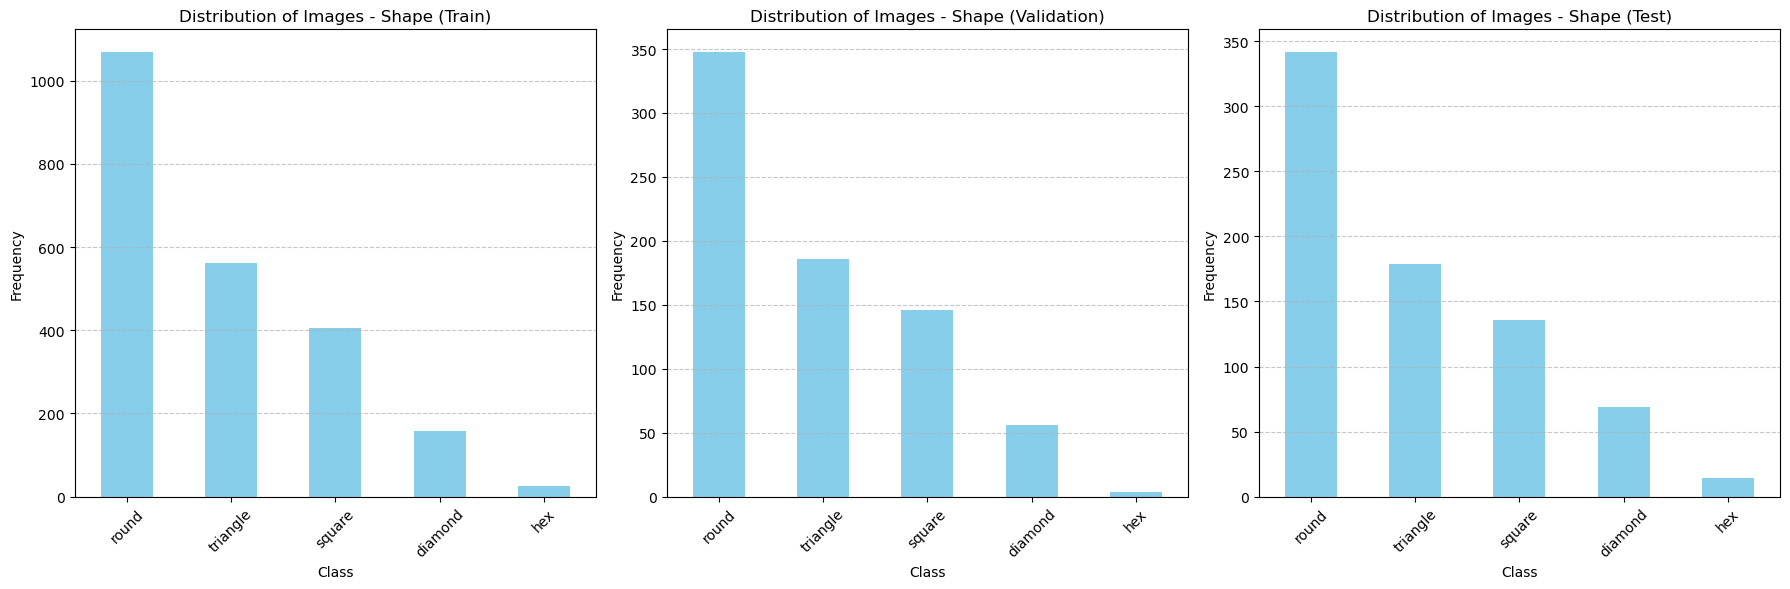

In [13]:
# Create subplots for side-by-side comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the distribution of images by 'Shape' on the first subplot
train_data_shape['Shape'].value_counts().plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Images - Shape (Train)')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot the distribution of images by 'Shape' on the second subplot for validation data
val_data_shape['Shape'].value_counts().plot(kind='bar', color='skyblue', ax=axes[1])
axes[1].set_title('Distribution of Images - Shape (Validation)')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot the distribution of images by 'Shape' on the third subplot for test data
test_data_shape['Shape'].value_counts().plot(kind='bar', color='skyblue', ax=axes[2])
axes[2].set_title('Distribution of Images - Shape (Test)')
axes[2].set_xlabel('Class')
axes[2].set_ylabel('Frequency')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


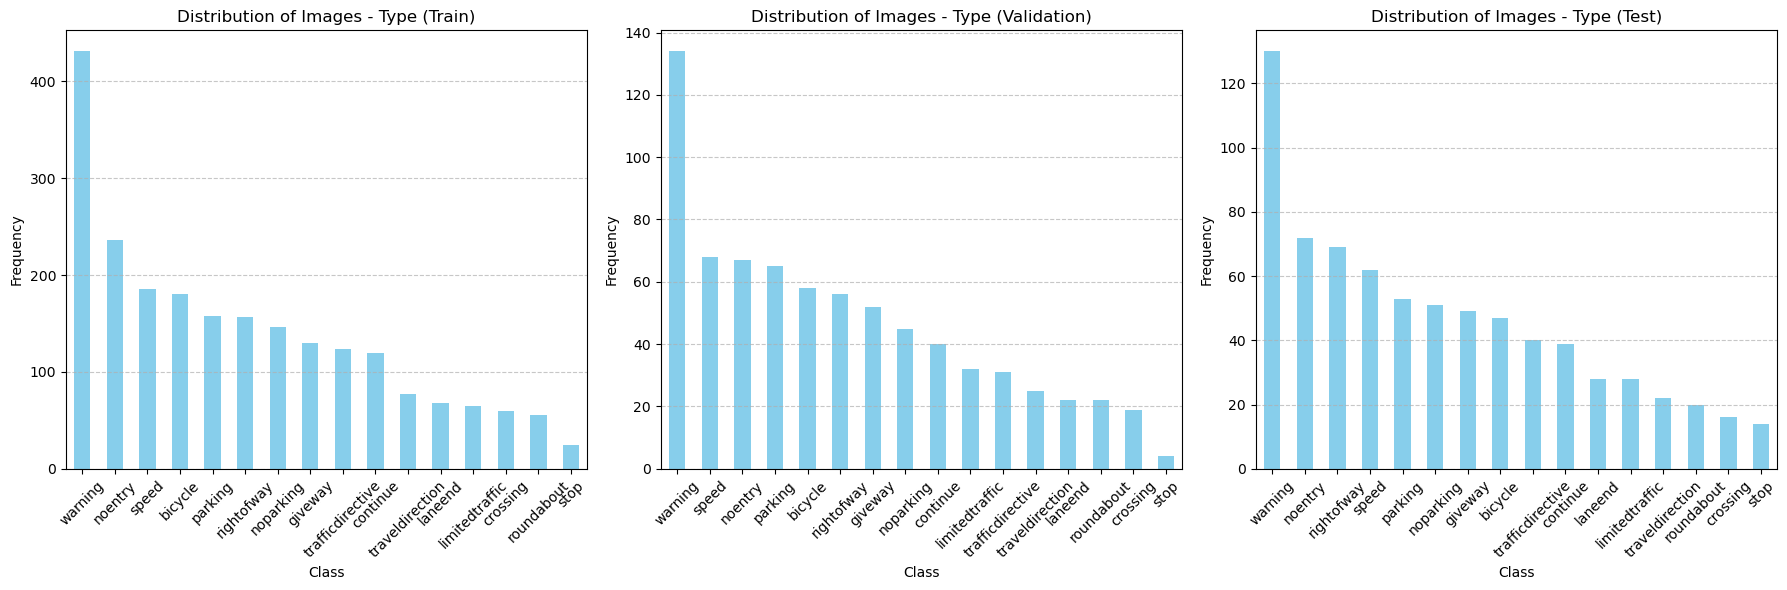

In [14]:
# Create subplots for side-by-side comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the distribution of images by 'Type' on the first subplot
train_data_type['Type'].value_counts().plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Images - Type (Train)')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot the distribution of images by 'Type' on the second subplot for validation data
val_data_type['Type'].value_counts().plot(kind='bar', color='skyblue', ax=axes[1])
axes[1].set_title('Distribution of Images - Type (Validation)')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot the distribution of images by 'Type' on the third subplot for test data
test_data_type['Type'].value_counts().plot(kind='bar', color='skyblue', ax=axes[2])
axes[2].set_title('Distribution of Images - Type (Test)')
axes[2].set_xlabel('Class')
axes[2].set_ylabel('Frequency')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


#### One-hot Encoding

In [15]:
# Convert the boolean encoding to integer
def bool_to_int(df_encoded) -> pd.DataFrame:
    """Convert boolean encoding to integer encoding"""
    for col in df_encoded.columns:
        if df_encoded[col].dtype == bool:
            df_encoded[col] = df_encoded[col].astype(int)
    return df_encoded

In [16]:
def one_hot_encoding(train_data, val_data, test_data, col):
    
    train_data_encoded = pd.get_dummies(train_data[col])
    val_data_encoded = pd.get_dummies(val_data[col])
    test_data_encoded = pd.get_dummies(test_data[col])

    # Concatenate the encoded columns with the original DataFrame for train_data_shape
    train_data_encoded = pd.concat([train_data, train_data_encoded], axis=1)
    val_data_encoded = pd.concat([val_data, val_data_encoded], axis=1)
    test_data_encoded = pd.concat([test_data, test_data_encoded], axis=1)

    # Drop the original 'Shape' column for train_data_shape
    train_data_encoded.drop([col], axis=1, inplace=True)
    val_data_encoded.drop([col], axis=1, inplace=True)
    test_data_encoded.drop([col], axis=1, inplace=True)

    train_data_encoded = bool_to_int(train_data_encoded)
    val_data_encoded = bool_to_int(val_data_encoded)
    test_data_encoded = bool_to_int(test_data_encoded)

    return train_data_encoded, val_data_encoded, test_data_encoded


In [17]:
train_data_type_encoded, val_data_type_encoded, test_data_type_encoded = one_hot_encoding(train_data_type, val_data_type, test_data_type, "Type")
train_data_shape_encoded, val_data_shape_encoded, test_data_shape_encoded = one_hot_encoding(train_data_shape, val_data_shape, test_data_shape, "Shape")

In [18]:
# print the shape of the encoded dataframes to ensure they have the same number of rows after preprocessing
print(train_data_type_encoded.shape)
print(train_data_shape_encoded.shape)

(2219, 18)
(2219, 7)


In [19]:
# Save to CSV
train_data_type_encoded.to_csv('processed_data/train_data_type_encoded.csv', index=False)
val_data_type_encoded.to_csv('processed_data/val_data_type_encoded.csv', index=False)
test_data_type_encoded.to_csv('processed_data/test_data_type_encoded.csv', index=False)

train_data_shape_encoded.to_csv('processed_data/train_data_shape_encoded.csv', index=False)
val_data_shape_encoded.to_csv('processed_data/val_data_shape_encoded.csv', index=False)
test_data_shape_encoded.to_csv('processed_data/test_data_shape_encoded.csv', index=False)